<a href="https://colab.research.google.com/github/Dr-Carlos-Villasenor/TopicosAvanzadosComputacion2/blob/master/DL_L02_P01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tópicos Avanzados de Computación II
##Dr. Carlos Villaseñor
##Lección 2 - Redes neuronales de una sola neurona
### Programación de neurona lineal

Primeramente importemos unos paquetes importantes

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Definamos nuestra neurona sigmoidal para hacer regresión logística

In [2]:
class Linear_Neuron:

  def __init__(self, n_inputs, learning_rate=0.1):
    self.w = - 1 + 2 * np.random.rand(n_inputs)
    self.b = - 1 + 2 * np.random.rand()
    self.eta = learning_rate

  def predict(self, X):
    Y_est = np.dot(self.w, X) + self.b
    return Y_est

  def train(self, X, Y, epochs=50, solver='BGD'):
    _, p = X.shape
    
    if solver == 'SGD': # Stochastic Gradient Descent
        for _ in range(epochs):
            for i in range(p):                
                y_est = self.predict(X[:,i])
                self.w += self.eta * (Y[:,i]-y_est) * X[:,i]
                self.b += self.eta * (Y[:,i]-y_est)
                
    elif solver == 'BGD': # Batch Gradient Descent
        for _ in range(epochs):
            Y_est = self.predict(X)
            self.w += (self.eta/p) * np.dot((Y - Y_est), X.T).ravel()
            self.b += (self.eta/p) * np.sum(Y - Y_est)
                
    else: # Pseudo-inverse (Direct method)
        X_hat = np.concatenate((np.ones((1,p)),X), axis=0)
        w_hat = np.dot(Y.reshape(1,-1), np.linalg.pinv(X_hat))
        self.b = w_hat[0,0]
        self.w = w_hat[0,1:]


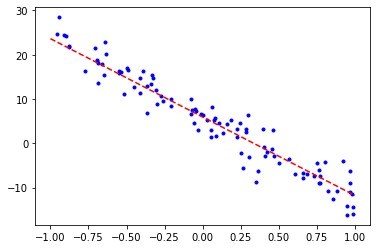

In [3]:
# Ejemplo
p =100
x = -1 + 2 * np.random.rand(p).reshape(1,-1)
y = -18 * x + 6 + 3 * np.random.randn(p)
plt.plot(x,y,'.b')


neuron = Linear_Neuron(1, 0.1)
neuron.train(x,y,solver='BGD', epochs=100 )

# Dibujar línea
xn = np.array([[-1, 1]])
plt.plot(xn.ravel() ,neuron.predict(xn),'--r')